In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Importing the dataset
train_data = pd.read_csv("data/fashion-mnist_train.csv")
test_data = pd.read_csv("data/fashion-mnist_test.csv")

In [5]:
# Inspecting the data
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1st column is for for the label (output) which we have to predict <br>
Rest of the 784 columns contains the pixels of the image ranging from 0-255 which is the range of the grayscale image <br>
Hence the images will have the dimension of sqrt(784) which is equal to 28x28

In [3]:
train_data.shape

(60000, 785)

In [4]:
test_data.shape

(10000, 785)

In [7]:
labels = {0: "T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}
def lookupLabel(index):
    return labels[index]

In [10]:
# Checking if our lookup function is working properly or not
lookupLabel(8)

'Bag'

In [11]:
# Converting to a numpy array
train_arr = np.array(train_data)
train_arr

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# Converting to a numpy array
test_arr = np.array(test_data)
test_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

'Coat'

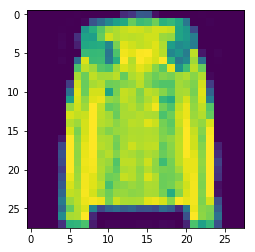

In [23]:
# Inspecting some random samples from data
rand = random.randint(1,60000)
plt.imshow(train_arr[rand,1:].reshape(28,28))
lookupLabel(train_arr[rand,0])

In [25]:
# Scaling the data
X_train = train_arr[:, 1:]/255
X_test = test_arr[:, 1:]/255

In [26]:
# Spliting target variable
y_train = train_arr[:, 0]
y_test = test_arr[:, 0]

In [27]:
# Reshaping into 28x28x1 images for our model
X_train = X_train.reshape([X_train.shape[0], 28, 28, 1])
X_train.shape

(60000, 28, 28, 1)

In [28]:
X_test = X_test.reshape([X_test.shape[0], 28, 28, 1])
X_test.shape

(10000, 28, 28, 1)